# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

Your task is to perform a comprehensive EDA following the requirements in the README.md file.

In [7]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styling
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
%matplotlib inline

## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

In [8]:
# Load the dataset
df = pd.read_csv('./data/Climate_Change_Indicators.csv') # Place the correct path to the file you are reading here (Make sure to load using the relative path)

# Display the first few rows of the dataset
df.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [ ]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

In [9]:
# TODO: Aggregate data by year to create a 124-year time series
# Your code here

# Ensure 'Year' is treated as an integer
df['Year'] = df['Year'].astype(int)

# Aggregate data by Year with different functions
df_new = df.groupby('Year').mean().reset_index()

# Display the first few rows
print(df_new.head())

# Save to a CSV file
df_new.to_csv('aggregated_data.csv', index=False)

   Year  Global Average Temperature (°C)  CO2 Concentration (ppm)  \
0  1900                        14.506663               350.373405   
1  1901                        14.485343               349.757140   
2  1902                        14.476262               349.299686   
3  1903                        14.492360               349.644375   
4  1904                        14.494241               349.537032   

   Sea Level Rise (mm)  Arctic Ice Area (million km²)  
0           150.408288                       8.978659  
1           150.548828                       8.947272  
2           152.174821                       9.035554  
3           150.138338                       9.056501  
4           150.667318                       8.990691  


## 2. Univariate Analysis

Analyze each climate variable independently.

In [ ]:
# TODO: Perform univariate analysis for each climate variable
# Include descriptive statistics and appropriate visualizations
# Your code here

# Descriptive Statistics
# Select the column for analysis
column_names = ["Global Average Temperature (°C)", "CO2 Concentration (ppm)", "Sea Level Rise (mm)", "Arctic Ice Area (million km²)"]

for column in column_names:
    data = df_new[column]
    mean_val = data.mean()
    median_val = data.median()
    std_dev = data.std()
    min_val = data.min()
    max_val = data.max()

    # Print statistics
    print(f"Univariate Analysis for {column}:")
    print(df_new[column].describe().round(2))
    print(f"Mean: {mean_val:.2f}")
    print(f"Median: {median_val:.2f}")
    print(f"Standard Deviation: {std_dev:.2f}")
    print(f"Minimum: {min_val:.2f}")
    print(f"Maximum: {max_val:.2f}")
    print("\n")


Univariate Analysis for Global Average Temperature (°C):
count    124.00
mean      14.50
std        0.01
min       14.47
25%       14.49
50%       14.50
75%       14.50
max       14.53
Name: Global Average Temperature (°C), dtype: float64
Mean: 14.50
Median: 14.50
Standard Deviation: 0.01
Minimum: 14.47
Maximum: 14.53


Univariate Analysis for CO2 Concentration (ppm):
count    124.00
mean     350.03
std        0.46
min      348.64
25%      349.69
50%      350.02
75%      350.37
max      351.00
Name: CO2 Concentration (ppm), dtype: float64
Mean: 350.03
Median: 350.02
Standard Deviation: 0.46
Minimum: 348.64
Maximum: 351.00


Univariate Analysis for Sea Level Rise (mm):
count    124.00
mean     149.99
std        1.03
min      148.05
25%      149.21
50%      149.92
75%      150.56
max      152.67
Name: Sea Level Rise (mm), dtype: float64
Mean: 149.99
Median: 149.92
Standard Deviation: 1.03
Minimum: 148.05
Maximum: 152.67


Univariate Analysis for Arctic Ice Area (million km²):
count    12

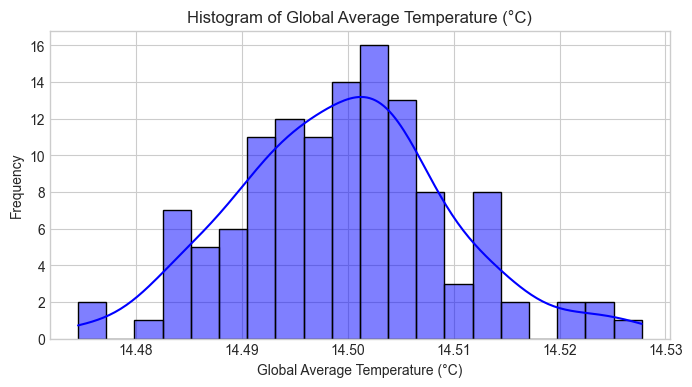

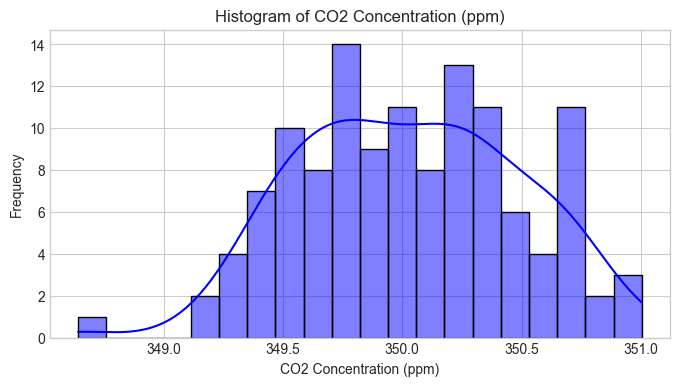

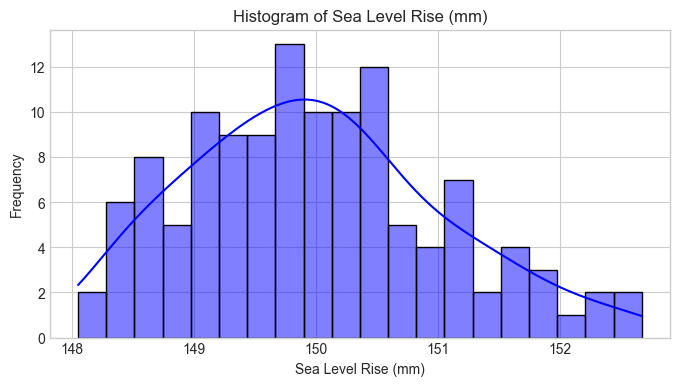

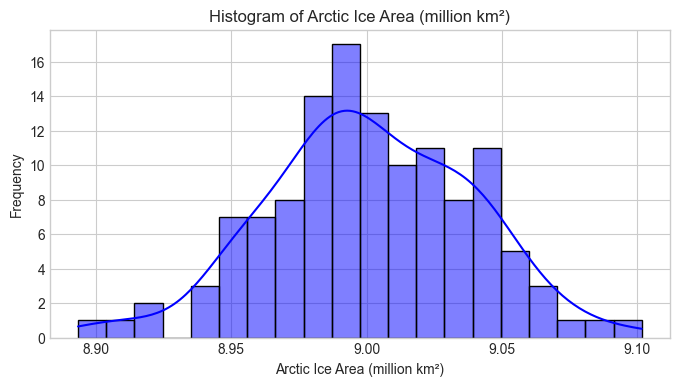

In [11]:
# Histogram to check distribution
for column in column_names:
    data = df_new[column]
    plt.figure(figsize=(8, 4))
    sns.histplot(data, bins=20, kde=True, color='blue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

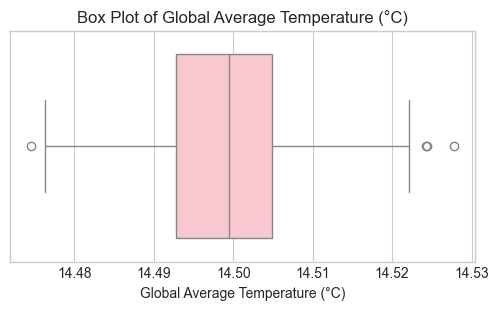

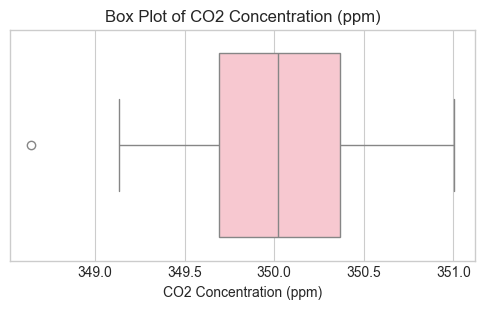

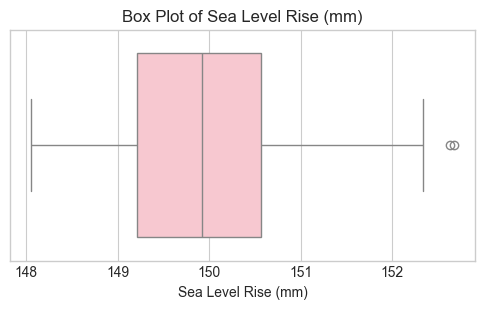

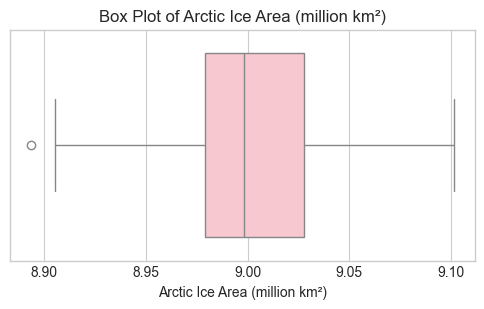

In [23]:
# Box plot to detect outliers
for column in column_names:
    data = df_new[column]
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=data, color='pink')
    plt.title(f'Box Plot of {column}')
    plt.show()

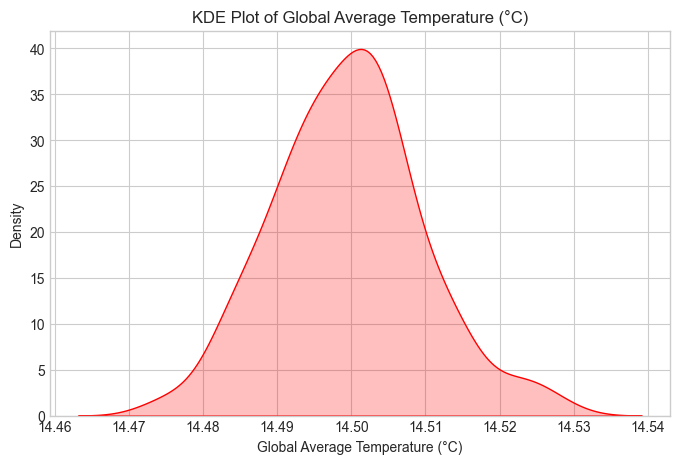

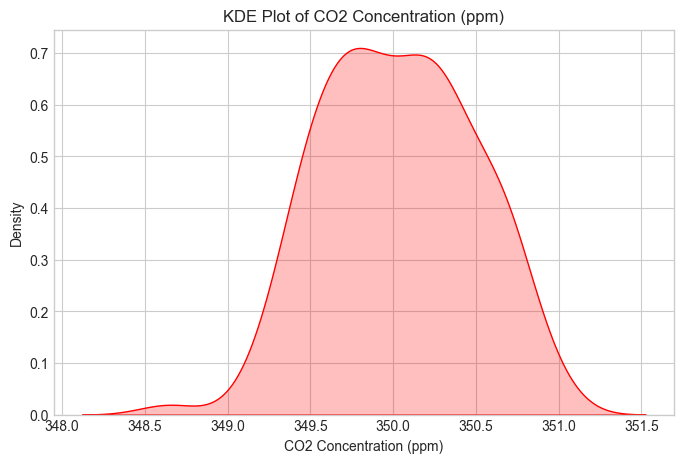

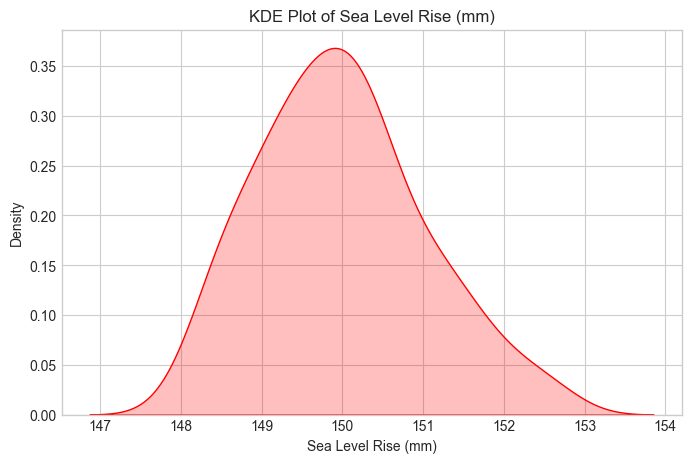

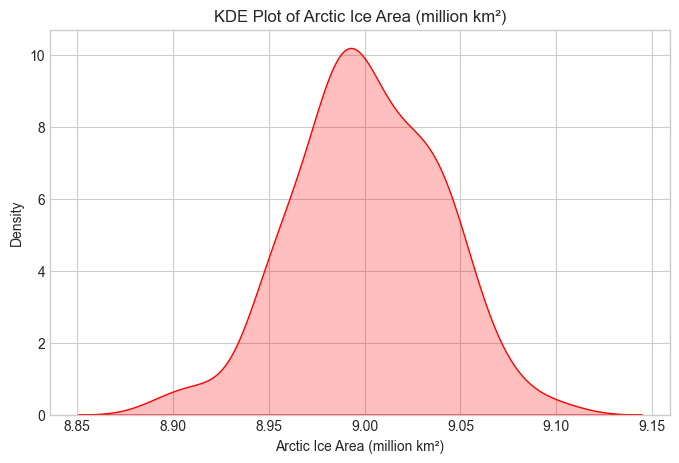

In [ ]:
# KDE plots for Univariate Analysis
for column in column_names:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(df_new[column], fill=True, color='red')
    plt.xlabel(f'{column}')
    plt.ylabel('Density')
    plt.title(f'KDE Plot of {column}')
    plt.grid(True)
    plt.show()

<Figure size 800x400 with 0 Axes>

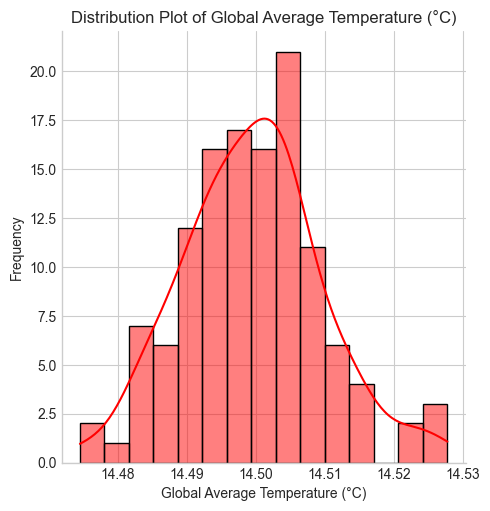

<Figure size 800x400 with 0 Axes>

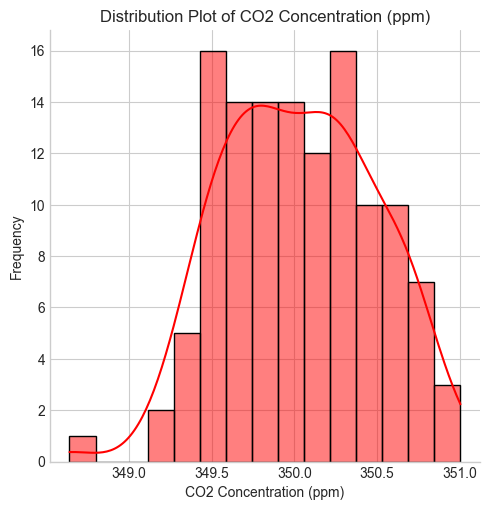

<Figure size 800x400 with 0 Axes>

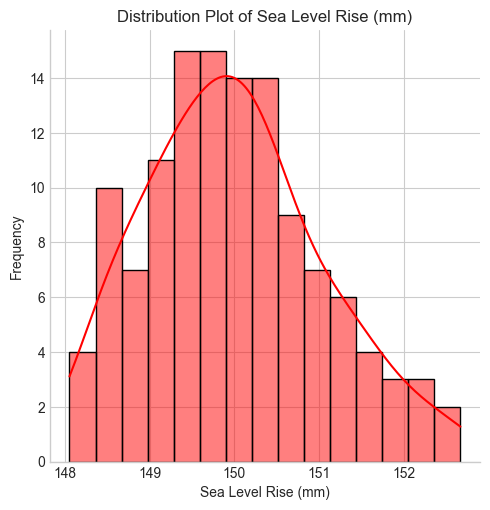

<Figure size 800x400 with 0 Axes>

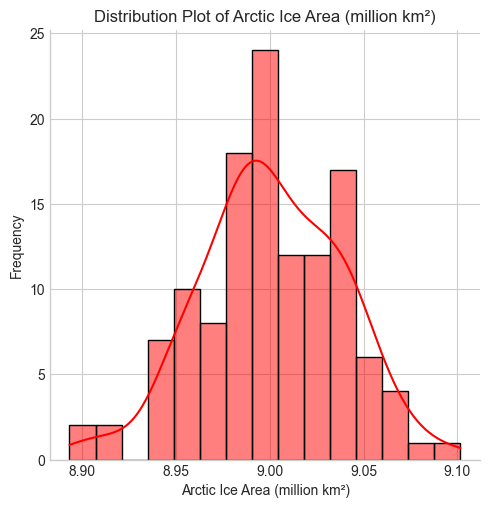

In [ ]:
# Distribution Plots
for column in column_names:
    plt.figure(figsize=(8,4))
    sns.displot(df_new[column], kde=True, bins=15, color='red')
    plt.xlabel(f'{column}')
    plt.ylabel('Frequency')
    plt.title(f'Distribution Plot of {column}')
    plt.show()

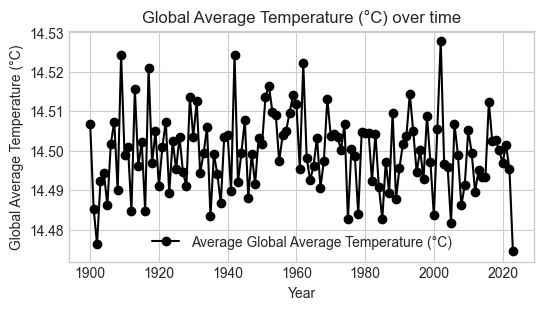

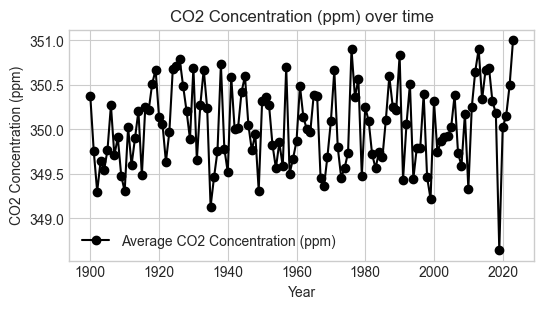

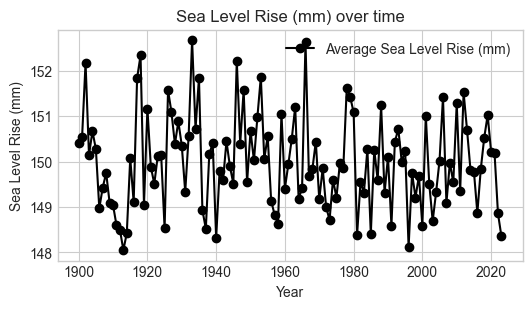

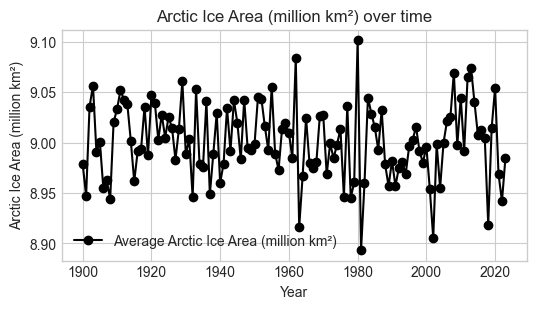

In [ ]:
# Time series plot
for column in column_names:
    plt.figure(figsize=(6, 3))
    plt.plot(df_new["Year"], df_new[column], marker='o', linestyle='-',color='black', label=f"Average {column}")
    plt.xlabel("Year")
    plt.ylabel(column)
    plt.title(f"{column} over time")
    plt.legend()
    plt.show()

## 3. Bivariate Analysis

Explore relationships between pairs of climate variables.

In [ ]:
# TODO: Perform bivariate analysis
# Include correlation analysis and appropriate visualizations
# Your code here

## 4. Multivariate Analysis

Investigate relationships among three or more variables.

In [ ]:
# TODO: Perform multivariate analysis
# Create advanced visualizations showing multiple variables
# Your code here

## 5. Conclusions and Insights

Summarize your findings and discuss their implications.

### 5.1 Conclusion and Insights of Univariate Analysis

#### A. Global Average Temperature (°C)

The mean and median are both 14.50°C, indicating a symmetrical distribution with minimal fluctuations.
The standard deviation is extremely low (0.01°C), showing that temperature changes are minimal in this dataset.
The range is only 0.05°C, suggesting very little variation in global average temperatures.

Insight: The temperature data is highly stable with negligible variation, but even small changes can have significant climate impacts over time

#### B. CO₂ Concentration (ppm)

The mean CO₂ concentration is 350.03 ppm, with a median of 350.02 ppm, showing a near-normal distribution.
The range (2.36 ppm) indicates a slight variation in CO₂ levels.
The standard deviation (0.46 ppm) suggests minor fluctuations.

Insight: The data indicates a consistent increase in CO₂ levels, which could be a contributing factor to global temperature changes.

#### C. Sea Level Rise (mm)

The mean sea level is 149.99 mm, with a median of 149.92 mm, showing a slight positive skew.
The range is 4.62 mm, indicating moderate variation.
The standard deviation (1.03 mm) suggests some fluctuation in sea levels over time.

Insight: Rising sea levels, even in small increments, can have severe consequences, such as increased coastal flooding and habitat loss.

#### D. Arctic Ice Area (million km²)

The mean and median are both 9.00 million km², showing a balanced distribution.
The range is 0.21 million km², indicating minor fluctuations.
The low standard deviation (0.04 million km²) suggests minimal changes in Arctic ice area during this period.

Insight: While the data suggests stability, even small decreases in Arctic ice can accelerate global warming due to reduced albedo effect (less ice means more heat absorption by oceans).
